### 🎯 **Theory: Encoding Numerical to Categorical Data**

In data preprocessing, we often talk about **converting categorical data into numbers** (e.g., via one-hot or label encoding). But sometimes, we also need to do the **reverse**:

> **"Encoding numerical data as categorical"** means **converting continuous or discrete numbers into meaningful categories or groups**.

---

## 🔁 Why Convert Numerical to Categorical?

1. **Improve model interpretability**
   E.g., instead of using exact ages, group into "Child", "Adult", "Senior".

2. **Handle non-linear relationships**
   Some models (like decision trees) perform better when numeric variables are grouped.

3. **Domain knowledge**
   E.g., Income brackets: `<30k`, `30k–60k`, `>60k`.

---

## 🧠 How to Convert?

### ✅ 1. **Binning / Bucketing**

Divide a numerical range into fixed intervals.

* `pandas.cut()` → equal-width bins
* `pandas.qcut()` → equal-frequency bins (quantiles)

```python
pd.cut(df['Age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Senior'])
```

---

### ✅ 2. **Custom Mapping**

Based on domain logic:

```python
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)
```

---

### ✅ 3. **Quantile-based Categories**

Automatically splits based on percentiles (e.g., quartiles):

```python
pd.qcut(df['Income'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])
```


### **Encoding Numerical to Categorical Data: Theory & Methods**

Numerical data can be converted into categorical data (bins, groups, or labels) for better analysis, visualization, or modeling. This process is called **numerical-to-categorical encoding** or **discretization**.

---

## **1. Why Convert Numerical to Categorical?**
- **Simplification**: Easier interpretation (e.g., "Young", "Middle-aged", "Senior" instead of exact ages).
- **Handling non-linear relationships**: Some ML models (e.g., Decision Trees) work better with categories.
- **Reduce noise**: Binning smooths out fluctuations in continuous data.
- **Privacy**: Hiding exact values (e.g., income ranges instead of exact salaries).

---

## **2. Common Techniques for Discretization**

### **(1) Equal-Width Binning (Uniform Binning)**
- Divides data into **equal-sized intervals**.
- Formula:  
  \[
  \text{Bin width} = \frac{\text{Max value} - \text{Min value}}{\text{Number of bins}}
  \]
- **Example**:  
  - Data: `[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]`  
  - Bins: `[10-30), [30-50), [50-70), [70-90), [90-110]`  
  - Labels: `["Low", "Medium", "High", "Very High"]`

### **(2) Equal-Frequency Binning (Quantile Binning)**
- Divides data into bins with **equal number of samples**.
- Uses percentiles (e.g., quartiles, deciles).
- **Example**:  
  - Data: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`  
  - 4 bins → Quartiles: `[1-3), [3-5), [5-7), [7-10]`  

### **(3) K-Means Binning**
- Uses clustering (`KMeans`) to group similar numerical values.
- Better for non-uniform distributions.

### **(4) Custom Binning (Domain Knowledge)**
- Manually define bins based on business logic.  
  - Example (Age Groups):  
    - `0-18` → "Child"  
    - `19-35` → "Young Adult"  
    - `36-60` → "Adult"  
    - `60+` → "Senior"

---

## **3. Implementation in Python**
### **(A) Pandas `cut()` (Equal-Width Binning)**
```python
import pandas as pd

data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins = [0, 30, 50, 70, 90, 110]
labels = ["Low", "Medium", "High", "Very High", "Extreme"]

df = pd.DataFrame({"Values": data})
df["Category"] = pd.cut(df["Values"], bins=bins, labels=labels)

print(df)
```
**Output:**
```
   Values Category
0      10      Low
1      20      Low
2      30   Medium
3      40   Medium
4      50     High
5      60     High
6      70 Very High
7      80 Very High
8      90  Extreme
9     100  Extreme
```

### **(B) Pandas `qcut()` (Equal-Frequency Binning)**
```python
df["Quantile_Bin"] = pd.qcut(df["Values"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
print(df)
```
**Output:**
```
   Values Quantile_Bin
0      10           Q1
1      20           Q1
2      30           Q2
3      40           Q2
4      50           Q3
5      60           Q3
6      70           Q4
7      80           Q4
8      90           Q4
9     100           Q4
```

### **(C) Scikit-Learn `KBinsDiscretizer`**
```python
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

X = np.array(data).reshape(-1, 1)
encoder = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='ordinal')
df["KBins"] = encoder.fit_transform(X)

print(df)
```
**Output:**
```
   Values  KBins
0      10    0.0
1      20    0.0
2      30    1.0
3      40    1.0
4      50    2.0
5      60    2.0
6      70    2.0
7      80    2.0
8      90    2.0
9     100    2.0
```

---

## **4. Choosing the Right Method**
| **Method**               | **When to Use**                          | **Pros & Cons**                          |
|--------------------------|-----------------------------------------|------------------------------------------|
| **Equal-Width (`cut`)**  | Uniformly distributed data              | Simple, but sensitive to outliers       |
| **Equal-Freq (`qcut`)**  | Skewed data                             | Balanced bins, but may have irregular ranges |
| **K-Means Binning**      | Non-linear distributions                | Better clustering, but computationally heavy |
| **Custom Binning**       | Domain-specific grouping (e.g., age)    | Flexible, but requires manual effort    |

---

## **5. Key Considerations**
1. **Number of Bins**: Too few → loss of info; too many → overfitting.
2. **Outliers**: Use robust strategies (e.g., quantiles) if outliers exist.
3. **ML Impact**: Some models (e.g., linear regression) perform worse with categorical data.
4. **Ordinality**: If categories have order (e.g., "Low", "Medium", "High"), use **ordinal encoding**.

---

### **Final Thoughts**
- **Use `pd.cut()`/`pd.qcut()`** for quick binning in Pandas.
- **Use `KBinsDiscretizer`** for ML pipelines.
- **Custom binning** works best when business rules are known.


#Practical Implementation

##our terget
- applying Decision Tree on Titanic Data set
- without Descritization and With Desctritization
- and see the changes for data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df=df.iloc[:,[1,2,4,5,6,7,9,11]]

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
df2=df
df2['Family']=df2['SibSp']+df2['Parch']

# df2['Family']=df2['Family'].map(lambda x: 1 if x>0 else 0) #check it instede of next 2 line code

bin=Binarizer(copy=False)
df2['Family']=bin.fit_transform(df2[['Family']])


df2=df2.drop(['SibSp','Parch'],axis=1)
df2.head(10)

<ipython-input-52-8df40fad088d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Family']=df2['SibSp']+df2['Parch']
<ipython-input-52-8df40fad088d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Family']=bin.fit_transform(df2[['Family']])


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
5,0,3,male,NaN,8.4583,Q,0
6,0,1,male,54.0,51.8625,S,0
7,0,3,male,2.0,21.0750,S,1
8,1,3,female,27.0,11.1333,S,1
9,1,2,female,14.0,30.0708,C,1


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


#Befor Descritization

In [ ]:
X=df.drop(['Survived','Family'],axis=1)
y=df['Survived']

#corrs score: 0.78

In [ ]:
# X=df2.drop(['Survived'],axis=1)
# y=df2['Survived']

# #0.79  (improved)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


##EDA Befor Descritization

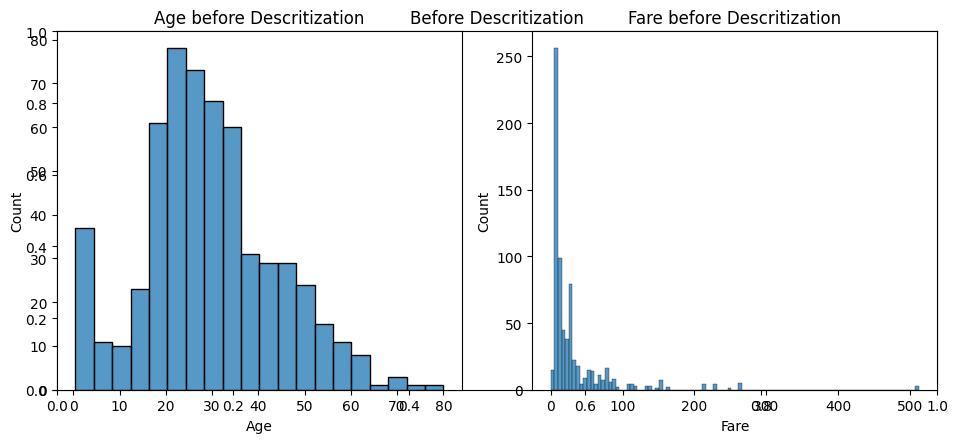

In [ ]:
#EDA Perform
plt.figure(figsize=(10,5))
plt.title('Before Descritization')
plt.subplot(121)
sns.histplot(X_train['Age'])
plt.title('Age before Descritization')

plt.subplot(122)
sns.histplot(X_train['Fare'])
plt.title('Fare before Descritization')

plt.tight_layout()

In [ ]:
age_pipe=Pipeline([
    ('age_imp',SimpleImputer())
])

emb_pipe=Pipeline([
    ('emb_imp',SimpleImputer(strategy='most_frequent'))
])

sex_emb_pipe=Pipeline([
        ('emb_imp',SimpleImputer(strategy='most_frequent')),
        ('ohe',OneHotEncoder(dtype=np.int32,handle_unknown='ignore',sparse_output=False))
    ])


In [ ]:
ct=ColumnTransformer([
    ('age',age_pipe,['Age']),
    # ('emb',emb_pipe,['Embarked']),
    ('sex_emb',sex_emb_pipe,['Sex','Embarked'])
],remainder='passthrough')

pipe_without_des=Pipeline([
    ('tf',ct),
    ('model',DecisionTreeClassifier())
])

pipe_without_des.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('age_imp',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('sex_emb',
                                                  Pipeline(steps=[('emb_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', DecisionTreeClassifier())])

In [ ]:
y_pred=pipe_without_des.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.770949720670391

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe_without_des,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7598345316655176)

# After Descritization(Numarical to Catagorical)

In [ ]:
age_pipe=Pipeline([
    ('age_imp',SimpleImputer()),
    ('age_des',KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal'))
])

fare_pipe=Pipeline([
    ('fare_des',KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal'))
])

sex_emb_pipe=Pipeline([
        ('emb_imp',SimpleImputer(strategy='most_frequent')),
        ('ohe',OneHotEncoder(dtype=np.int32,handle_unknown='ignore',sparse_output=False))
    ])


In [ ]:
ct2=ColumnTransformer([
    ('age',age_pipe,['Age']),
    ('fare',fare_pipe,['Fare']),
    ('sex_emb',sex_emb_pipe,['Sex','Embarked'])
],remainder='passthrough')



#EDA After Discretisation

In [ ]:
dzt=ct2.fit_transform(X_train)
dzt

array([[5., 7., 0., ..., 1., 0., 0.],
       [2., 4., 0., ..., 2., 0., 0.],
       [3., 2., 0., ..., 3., 0., 0.],
       ...,
       [5., 4., 0., ..., 3., 2., 0.],
       [1., 9., 1., ..., 1., 1., 2.],
       [2., 9., 0., ..., 1., 0., 1.]])

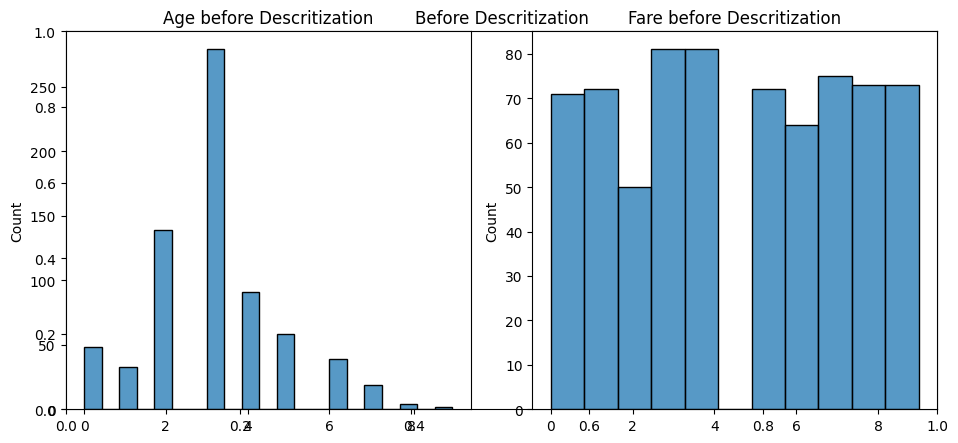

In [ ]:
#EDA Perform
plt.figure(figsize=(10,5))
plt.title('Before Descritization')
plt.subplot(121)
sns.histplot(dzt[:,0])
plt.title('Age before Descritization')

plt.subplot(122)
sns.histplot(dzt[:,1])
plt.title('Fare before Descritization')

plt.tight_layout()

In [ ]:
 pipe_with_des=Pipeline([
    ('tf',ct2),
    ('model',DecisionTreeClassifier())
])

pipe_with_des.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('age_imp',
                                                                   SimpleImputer()),
                                                                  ('age_des',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=10,
                                                                                    strategy='uniform'))]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('fare_des',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=10))]),
                                                  ['Fare']),
                                                 ('sex_emb',
                                                  Pipeline(steps=[('emb_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', DecisionTreeClassifier())])

In [ ]:
y_pred=pipe_with_des.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

##note: After Descritization Accuracy improved

In [ ]:
accuracy_score(y_pred,y_test)

0.8156424581005587

In [ ]:
cross_val_score(pipe_with_des,X_train,y_train,cv=5,scoring='accuracy').mean()

np.float64(0.7823007977937555)

In [ ]:
# kb=KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')

# X_train['Transfrom']=kb.fit_transform(X_train[['Fare']])
# kb.bin_edges_

#Custom Binning

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


<Axes: xlabel='Family', ylabel='count'>

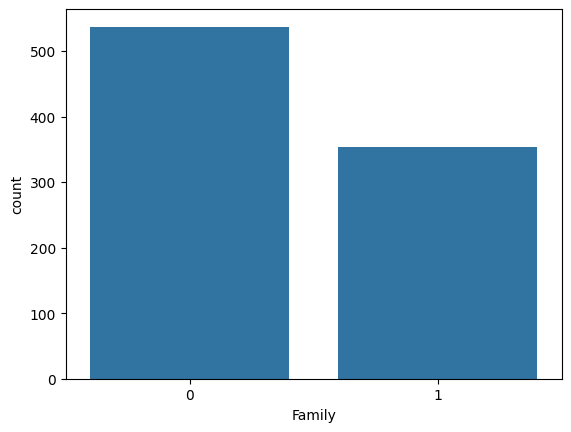

In [ ]:
sns.countplot(data=df,x='Family')

In [ ]:
def rangeAge(age):
  if age<18:
    return 1
  elif age>=18 and age<=40:
    return 2
  elif age>40:
    return 3


In [ ]:
# df['new age']=df['Age'].map(lambda x:rangeAge(x))
df['new age']=df['Age'].apply(lambda x:rangeAge(x))

In [ ]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,new age
579,1,3,male,32.0,0,0,7.9250,S,0,2.0
153,0,3,male,40.5,0,2,14.5000,S,1,3.0
251,0,3,female,29.0,1,1,10.4625,S,1,2.0
351,0,1,male,NaN,0,0,35.0000,S,0,NaN
375,1,1,female,NaN,1,0,82.1708,C,1,NaN
166,1,1,female,NaN,0,1,55.0000,S,1,NaN
533,1,3,female,NaN,0,2,22.3583,C,1,NaN
133,1,2,female,29.0,1,0,26.0000,S,1,2.0
412,1,1,female,33.0,1,0,90.0000,Q,1,2.0
381,1,3,female,1.0,0,2,15.7417,C,1,1.0


<Axes: xlabel='new age', ylabel='Count'>

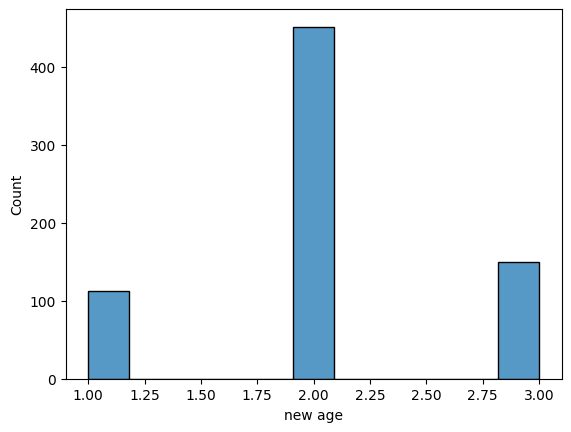

In [ ]:
sns.histplot(data=df,x='new age')